# Лабораторная работа №1

### Цель работы
Практическое применение дискретного преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.

### Задачи лабораторной работы

1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса
3. Построить сонограмму по записи своего голоса.

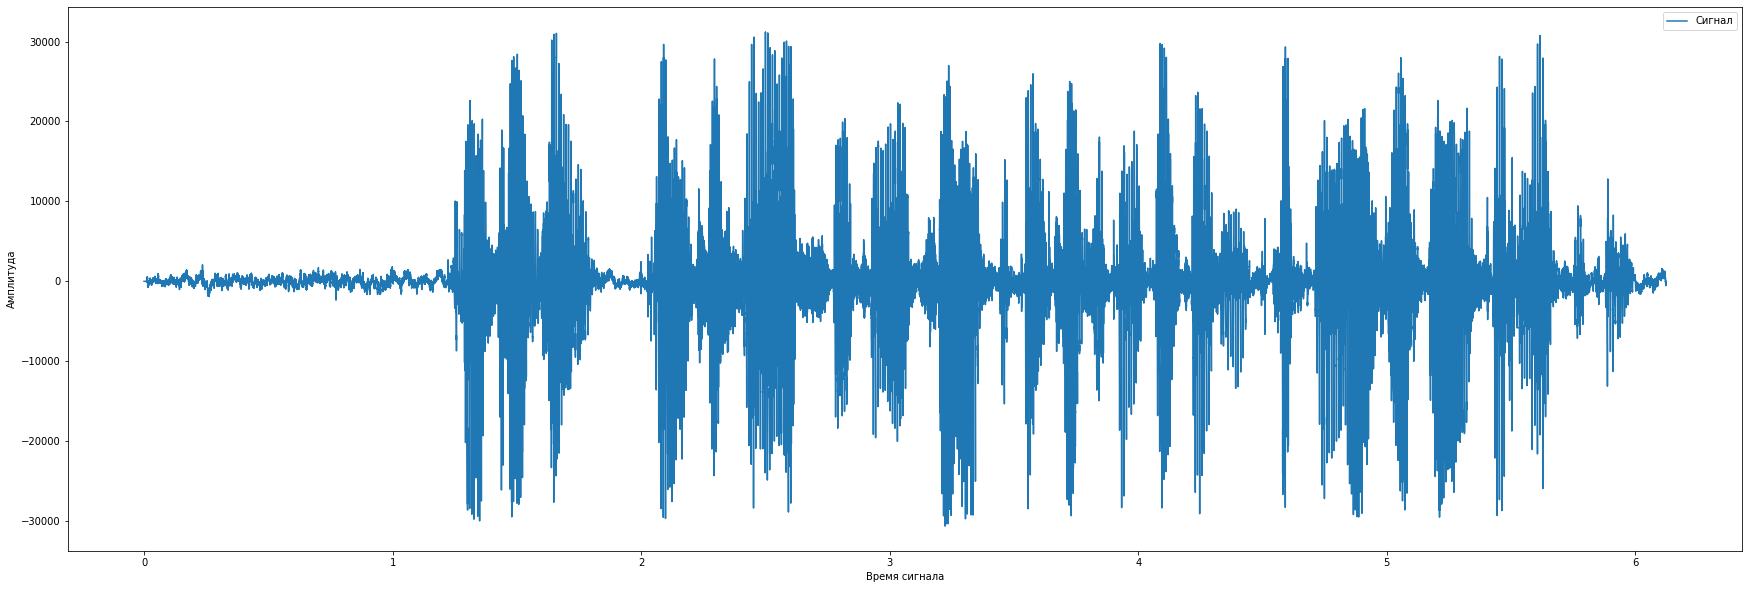

In [2]:
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

samplerate, data = wavfile.read("voice.wav")
slength = data.shape[0] / samplerate
stime = np.linspace(0, slength, data.shape[0])

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(stime, data, label="Сигнал")
plt.legend()
plt.xlabel("Время сигнала")
plt.ylabel("Амплитуда")
plt.show()

### Построение траектории основного тона

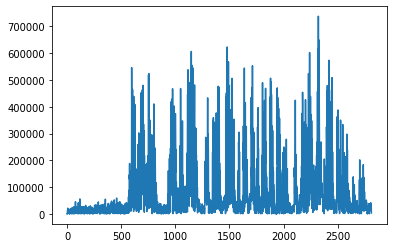

In [163]:
n = 64
shift = round(n*0.25)
#print(shift)
i = 0
res = []
while i < len(data):
    res.append(data[i:i+n])
    i = i + n - shift
res = [i*np.hamming(len(i)) for i in res]#умножаем на окно хемминга

def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X
res = [DFT(i) for i in res]
amplitude_spec = [sum([j**2 for j in i[:int(len(i)/2)]])**0.5 for i in res]#амплитудный спектр = корень(сумма квадратов)
amplitude_spec = np.array([i.real for i in amplitude_spec])
plt.plot(amplitude_spec)

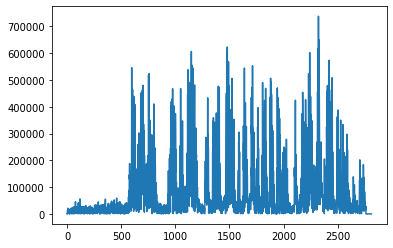

In [132]:
spec_res = round(samplerate/n)
F0 = []
sections = []

for i in range(0, len(amplitude_spec), spec_res):
    sections.append(amplitude_spec[i:i + spec_res])

for i in sections:
    section = np.array(i)
    if section.max() > 3*section.mean():            
        F0 += section.tolist()
    else:
        F0 += [0 for i in range(len(section))]
        
plt.plot(F0)

### Построение траекторий второй, третьей и четвертой формантных частот

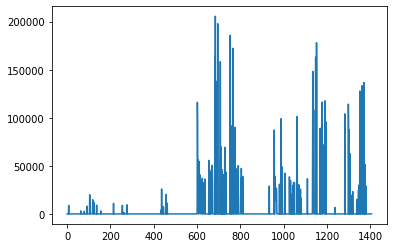

In [108]:
F1 = []

for i in range(int(len(F0)/2)):#поиск второй форманты на отрезке len(F0)/2
    max_spec = max([F0[2*i], F0[2*i-1], F0[2*i+1]])
    if F0[i] > 2*max_spec:           
        F1 += [max_spec]
    else:
        F1 += [0]
            
plt.plot(F1)

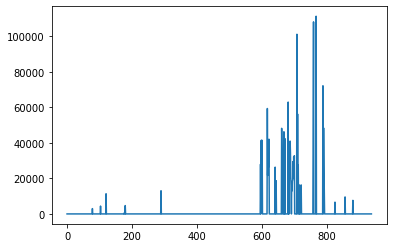

In [109]:
F2 = []

for i in range(int(len(F0)/3)):#поиск третьей форманты на отрезке len(F0)/3
    max_spec = max([F0[3*i], F0[3*i-1], F0[3*i+1]])
    if F0[i] > 3*max_spec:           
        F2 += [max_spec]
    else:
        F2 += [0]
            
plt.plot(F2)

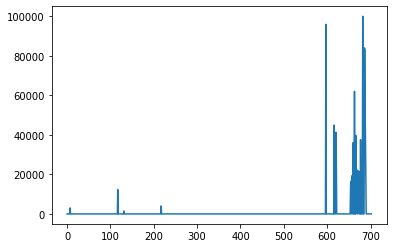

In [110]:
F3 = []

for i in range(int(len(F0)/4)):#поиск четвёртой форманты на отрезке len(F0)/4
    max_spec = max([F0[4*i], F0[4*i-1], F0[4*i+1]])
    if F0[i] > 4*max_spec:           
        F3 += [max_spec]
    else:
        F3 += [0]

plt.plot(F3)

### Построение сонограммы

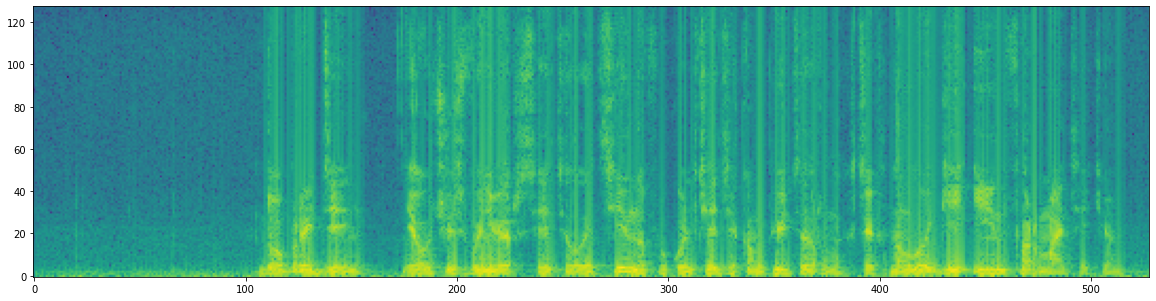

In [162]:
from scipy import fft

N = 256
S = []
for k in range(0, data.shape[0]+1, N):
    x = fft.fftshift(fft.fft(data[k:k+N], n=N))[N//2:N]
    Pxx = 10*np.log10(np.real(x*np.conj(x)))
    S.append(Pxx)
S = np.array(S)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.imshow(S.T, origin='lower')